# User-based EDA



## Loading packages

In [178]:
import sys
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import warnings
import mlflow 
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline


In [179]:

df_ratings = pd.read_csv('../data/small/ratings.csv')
df_movies= pd.read_csv('../data/small/movies.csv')
df_tags = pd.read_csv('../data/small/tags.csv')
df_links = pd.read_csv('../data/small/links.csv')

In [180]:
df_movies.head()
df_movies.shape
df_ratings.head()
df_ratings.shape
df_tags.head()
df_tags.shape
df_links.head()
df_links.shape

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

(9742, 3)

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

(100836, 4)

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

(3683, 4)

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

(9742, 3)

In [181]:
df_ratings.drop('timestamp', inplace=True, axis=1)
df_tags.drop('timestamp', inplace=True, axis=1)


In [182]:
df_ratings.movieId.nunique()

9724

## 18 movies do not have ratings. (9724 out of 9742)

In [183]:
df_ratings.head()

userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0

In [184]:
ProfileReport(df_ratings)

Summarize dataset:  57%|█████▋    | 8/14 [00:00<00:00, 34.86it/s, Calculate phi_k correlation]  /Users/moh/NeueFische/recommender-system-capstone/recommender-system-capstone/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/moh/NeueFische/recommender-system-capstone/recommender-system-capstone/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/moh/NeueFische/recommender-system-capstone/recommender-system-capstone/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in


## Ratings: from 0.5 to 5. (Mean = 3.5) 

## User-based Analysis
### Mean number of ratings pro user = 166 
### Median ratings pro user = 71

In [185]:
df_user_ratings = df_ratings.groupby('userId').count().sort_values(by='rating', ascending = False).reset_index()
df_user_ratings.head(20)
df_user_ratings.tail()
df_user_ratings.head(305).tail()

userId  movieId  rating
0      414     2698    2698
1      599     2478    2478
2      474     2108    2108
3      448     1864    1864
4      274     1346    1346
5      610     1302    1302
6       68     1260    1260
7      380     1218    1218
8      606     1115    1115
9      288     1055    1055
10     249     1046    1046
11     387     1027    1027
12     182      977     977
13     307      975     975
14     603      943     943
15     298      939     939
16     177      904     904
17     318      879     879
18     232      862     862
19     480      836     836

userId  movieId  rating
605     442       20      20
606     569       20      20
607     320       20      20
608     576       20      20
609      53       20      20

userId  movieId  rating
300     579       73      73
301     528       73      73
302     297       72      72
303     401       72      72
304     143       71      71

## Each user has rated at least 20 movies. 

<AxesSubplot:xlabel='rating', ylabel='Count'>

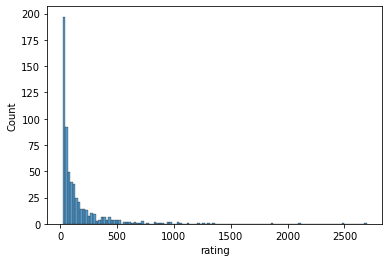

In [186]:
sns.histplot(data=df_user_ratings, x=df_user_ratings.rating, bins=120)


## Here we can clearly see that the most users rated a limited number of movies (median=71). Some extreme movie-viewers have rated more than a thousand films (11 users).  

[(0.0, 700.0)]

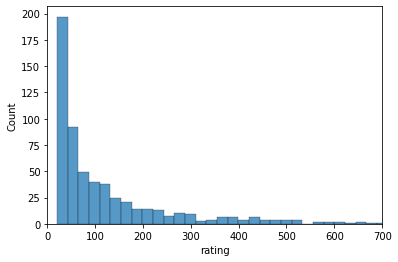

In [187]:
plot = sns.histplot(data=df_user_ratings, x=df_user_ratings.rating, bins=120)
plot.set(xlim=(0, 700))

## Plotting the individual users with their corresponding rating count:

<AxesSubplot:xlabel='userId', ylabel='rating'>

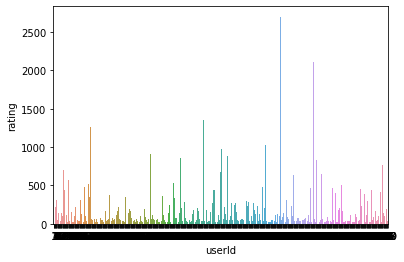

In [188]:

sns.barplot(data=df_user_ratings, x='userId', y ='rating' )

## From the plot we can notice a couple of users who have posted more than 2000 ratings! There are 12 users with more than 1000 ratings. 

## A histogram of the different ratings looks like this:

![image info](../images/ratings_hist.png)

## The mean rating is 3.5. The most users give a rating of 4, followed by 3. The fewest users give rating under 2 (6%) 

## How does the average rating per user look like? How far are they from the group rating's average? 
## Each user has already given at least 20 ratings, which allows to calculate an okey variance. The mean and standard deviation for each user will be calculated.

In [191]:
df_user_ratings_mean = df_ratings.groupby('userId').mean().sort_values(by='rating', ascending = False).reset_index()
df_user_ratings_std = df_ratings.groupby('userId').std().sort_values(by='rating', ascending = False).reset_index()

df_user_ratings_mean = df_user_ratings_mean.merge(df_user_ratings_std, on='userId')

df_user_ratings_mean.rename(columns={'rating_x':'rating_mean', 'rating_y':'rating_std'}, inplace=True)
df_user_ratings_mean.drop(['movieId_x', 'movieId_y'], inplace= True, axis=1)

df_user_ratings_mean.head(10)
df_user_ratings_mean.tail(10)


userId  rating_mean  rating_std
0      53     5.000000    0.000000
1     251     4.869565    0.526942
2     515     4.846154    0.339683
3      25     4.807692    0.376216
4      30     4.735294    0.553711
5     523     4.693333    0.449424
6     348     4.672727    0.432672
7     171     4.634146    0.598603
8     452     4.556931    0.605100
9      43     4.552632    0.679564

userId  rating_mean  rating_std
600       3     2.435897    2.090642
601     308     2.426087    1.498894
602     517     2.386250    1.347581
603     298     2.363685    1.082449
604     311     2.339286    1.262373
605     567     2.245455    1.221076
606     153     2.217877    1.431984
607     508     2.145833    1.057881
608     139     2.144330    0.894597
609     442     1.275000    0.697269

## It would be nice now to see how many movies these overly optimistic or pessmistic users already rated!

In [193]:
df_user_ratings.columns
df_red = df_user_ratings[['userId', 'rating']]
df_merge = df_user_ratings_mean.merge(df_red, on="userId")      
#df_user_ratings.head()      # Let's merge movie and rating 
df_merge.rename(columns={'rating':'rating_count'}, inplace=True)
#df_merge.rename(columns={'rating_x':'ratings_mean'}, inplace=True)
df_merge.head(20)
df_merge.tail()


Index(['userId', 'movieId', 'rating'], dtype='object')

userId  rating_mean  rating_std  rating_count
0       53     5.000000    0.000000            20
1      251     4.869565    0.526942            23
2      515     4.846154    0.339683            26
3       25     4.807692    0.376216            26
4       30     4.735294    0.553711            34
5      523     4.693333    0.449424            75
6      348     4.672727    0.432672            55
7      171     4.634146    0.598603            82
8      452     4.556931    0.605100           202
9       43     4.552632    0.679564           114
10     371     4.548780    0.533911            41
11     122     4.546233    0.492646           292
12     441     4.522222    0.775737            45
13     400     4.511628    0.592496            43
14      52     4.476923    0.631418           130
15     538     4.472973    0.588618            37
16     168     4.462766    0.730442            94
17     417     4.462687    0.724639            67
18     543     4.453947    1.294032            76
19     106     4.439394    0.788170            33

userId  rating_mean  rating_std  rating_count
605     567     2.245455    1.221076           385
606     153     2.217877    1.431984           179
607     508     2.145833    1.057881            24
608     139     2.144330    0.894597           194
609     442     1.275000    0.697269            20

## Sort by ratings count to see the behaviour of the extreme users!

In [194]:
df_merge.head()

userId  rating_mean  rating_std  rating_count
0      53     5.000000    0.000000            20
1     251     4.869565    0.526942            23
2     515     4.846154    0.339683            26
3      25     4.807692    0.376216            26
4      30     4.735294    0.553711            34

In [196]:
df_merge.sort_values(by='rating_count', ascending=False).head(10)
df_merge.sort_values(by='rating_count', ascending=False).tail(10)


userId  rating_mean  rating_std  rating_count
444     414     3.391957    0.933307          2698
588     599     2.642050    0.815300          2478
437     474     3.398956    0.830847          2108
572     448     2.847371    1.029706          1864
509     274     3.235884    0.761703          1346
309     610     3.688556    0.857422          1302
510      68     3.233730    0.896740          1260
317     380     3.673235    0.961010          1218
322     606     3.657399    0.724121          1115
535     288     3.145972    0.866584          1055

userId  rating_mean  rating_std  rating_count
520     257        3.200    1.005249            20
505     406        3.250    1.322876            20
451     147        3.375    1.440714            20
407     194        3.475    0.595487            20
388     320        3.525    0.785979            20
208     278        3.875    0.985086            20
148     569        4.000    0.725476            20
103     189        4.100    0.347926            20
69      595        4.200    0.833509            20
609     442        1.275    0.697269            20

## Under the top ten frequent raters/reviewers, there are two who have below-average ratings_mean (2.6 and 2.8). 


### Open Question: Are we allowed to normalize the ratings of the super-positive / super-negative users? (Those who have above average rating scores)

# Topic-2: Movie-based Analysis

### Mean number of ratings pro movie = 10
### Median ratings pro movie = 3
## we would like to sort movies by rating count:

In [197]:
df_grouped_movies = df_ratings.groupby('movieId').count().sort_values(by='userId', ascending=False)
df_grouped_movies.head(20)
df_grouped_movies.head(4862) # Median berechnen 

userId  rating
movieId                
356         329     329
318         317     317
296         307     307
593         279     279
2571        278     278
260         251     251
480         238     238
110         237     237
589         224     224
527         220     220
2959        218     218
1           215     215
1196        211     211
50          204     204
2858        204     204
47          203     203
780         202     202
150         201     201
1198        200     200
4993        198     198

userId  rating
movieId                
356         329     329
318         317     317
296         307     307
593         279     279
2571        278     278
...         ...     ...
2554          3       3
691           3       3
893           3       3
5337          3       3
5417          3       3

[4862 rows x 2 columns]

<AxesSubplot:xlabel='rating', ylabel='Count'>

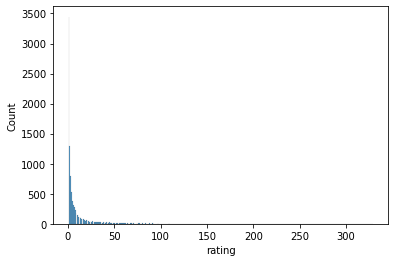

In [198]:
sns.histplot(data=df_grouped_movies, x='rating')

## The Y (count) range is very high. It might be that a very large number of movies has only one rating. We try to make this clearer with the log scale:

<AxesSubplot:xlabel='rating', ylabel='Count'>

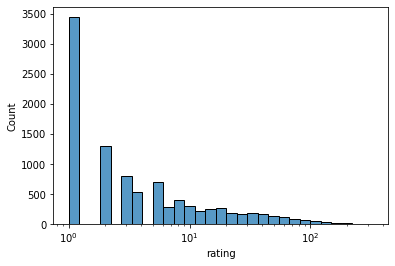

In [172]:
sns.histplot(data=df_grouped_movies, x='rating', log_scale=True)


## 3500 movies have indeed only one rating. Only three movies have more than 300 ratings. 
## Mean number of ratings per movie = 10

## Open Question: What should be done with the movies that have only one (or few) ratings? 

## Let's calculate the number of movies that have specific number of ratings


In [173]:
df_rating_count=df_grouped_movies.groupby('rating').count()
df_rating_count.head(20)

userId
rating        
1         3446
2         1298
3          800
4          530
5          382
6          319
7          278
8          230
9          172
10         148
11         154
12         118
13         105
14          94
15          78
16          74
17          79
18          68
19          54
20          62

## This dataframe would be useful to analyse a suitable cut-off number of ratings to be considered

## Let's calculate the average rating for each film

In [174]:
df_ratings_gr_movie = df_ratings.groupby('movieId').mean()['rating'].reset_index()
df_ratings_gr_movie.sort_values(by='rating', inplace=True)

df_ratings_gr_movie2 = df_ratings.groupby('movieId').std()['rating'].reset_index()

df_ratings_gr_movie = df_ratings_gr_movie.merge(df_ratings_gr_movie2, on='movieId')
df_ratings_gr_movie.head(20)
df_ratings_gr_movie.rating_y.unique()
df_ratings_gr_movie.tail(20)
df_ratings_gr_movie.query('rating_x == 3.5')



movieId  rating_x  rating_y
0     26696       0.5       NaN
1      3604       0.5       NaN
2      7312       0.5       NaN
3    145724       0.5       NaN
4     76030       0.5       NaN
5    145951       0.5       NaN
6     85334       0.5       NaN
7    129250       0.5       NaN
8    102025       0.5       NaN
9    175475       0.5       NaN
10    26717       0.5       NaN
11   167296       0.5       NaN
12     7636       0.5       NaN
13   109897       0.5       NaN
14   102735       0.5       NaN
15    60363       0.5       NaN
16     7742       0.5       NaN
17   165645       0.5       NaN
18    67799       0.5       NaN
19   110603       0.5       NaN

array([       nan, 0.        , 0.35355339, ..., 0.4472136 , 0.26726124,
       0.2236068 ])

movieId  rating_x  rating_y
9704   162414       5.0       NaN
9705   162344       5.0       NaN
9706    31522       5.0       NaN
9707     7096       5.0       NaN
9708   124404       5.0       NaN
9709   124851       5.0       NaN
9710   159811       5.0       NaN
9711     3951       5.0       NaN
9712     3942       5.0       NaN
9713   126088       5.0       NaN
9714     3941       5.0       NaN
9715     3940       5.0       NaN
9716     3939       5.0       NaN
9717   126921       5.0       NaN
9718   160644       5.0       NaN
9719     3851       5.0       NaN
9720   128087       5.0       NaN
9721    33138       5.0       NaN
9722    96608       5.0       NaN
9723    53355       5.0       NaN

movieId  rating_x  rating_y
5044    80834       3.5       NaN
5045    59810       3.5       NaN
5046    44788       3.5  0.447214
5047    25940       3.5       NaN
5048    58975       3.5       NaN
...       ...       ...       ...
5951     7051       3.5  0.707107
5952    97923       3.5  0.901388
5953   140523       3.5       NaN
5954     8465       3.5       NaN
5955     8534       3.5       NaN

[912 rows x 3 columns]

In [199]:
df_merge2 = df_ratings_gr_movie.merge(df_grouped_movies , on="movieId")  
df_merge2.rename(columns={'rating_x':'rating_mean', 'rating_y':'rating_std', 'rating':'rating_count'}, inplace=True)
df_merge2.drop('userId', inplace=True, axis=1)
df_merge2.head(20)
df_merge2.sample(10)

movieId  rating_mean  rating_std  rating_count
0     26696          0.5         NaN             1
1      3604          0.5         NaN             1
2      7312          0.5         NaN             1
3    145724          0.5         NaN             1
4     76030          0.5         NaN             1
5    145951          0.5         NaN             1
6     85334          0.5         NaN             1
7    129250          0.5         NaN             1
8    102025          0.5         NaN             1
9    175475          0.5         NaN             1
10    26717          0.5         NaN             1
11   167296          0.5         NaN             1
12     7636          0.5         NaN             1
13   109897          0.5         NaN             1
14   102735          0.5         NaN             1
15    60363          0.5         NaN             1
16     7742          0.5         NaN             1
17   165645          0.5         NaN             1
18    67799          0.5         NaN             1
19   110603          0.5         NaN             1

movieId  rating_mean  rating_std  rating_count
7480     5489     4.000000         NaN             1
7323     4033     3.923077    0.534094            13
6841    88129     3.765625    0.983611            32
7373    76093     3.943396    0.858556            53
7088     3088     3.833333    1.249242            12
8233    27708     4.000000         NaN             1
6816     3211     3.750000    0.353553             2
3519    57526     3.000000         NaN             1
1116     5246     2.125000    1.314978             4
7213     1844     3.875000    0.629153             4

movieId  mean_rating  rating_count
9719     3851          5.0             1
9720   128087          5.0             1
9721    33138          5.0             1
9722    96608          5.0             1
9723    53355          5.0             1

<AxesSubplot:xlabel='mean_rating', ylabel='Count'>

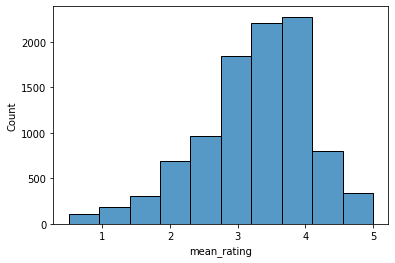

In [100]:
df_merge2.tail()
sns.histplot(data=df_merge2, x='mean_rating', bins=10)

#  End of Text

In [41]:
df_temp=df_ratings.head(10).reset_index()
#df_temp
df_temp2 = df_temp.pivot_table(values='userId', index=df_temp.index, columns='movieId').reset_index()#, aggfunc='rating')

df_com = pd.concat([df_temp,df_temp2], axis=1, join='inner')
df_com.head()

index  userId  movieId  rating   timestamp  index  307  481  1091  1257  \
0      0       1      307     3.5  1256677221      0  1.0  NaN   NaN   NaN   
1      1       1      481     3.5  1256677456      1  NaN  1.0   NaN   NaN   
2      2       1     1091     1.5  1256677471      2  NaN  NaN   1.0   NaN   
3      3       1     1257     4.5  1256677460      3  NaN  NaN   NaN   1.0   
4      4       1     1449     4.5  1256677264      4  NaN  NaN   NaN   NaN   

   1449  1590  1591  2134  2478  2840  
0   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN  
4   1.0   NaN   NaN   NaN   NaN   NaN

In [42]:
df_temp=df_ratings.head(10)
df_temp.index
df_temp
df_conv = df_temp.groupby(['userId', 'movieId'])['rating'].aggregate('first').unstack()
df_conv

RangeIndex(start=0, stop=10, step=1)

userId  movieId  rating   timestamp
0       1      307     3.5  1256677221
1       1      481     3.5  1256677456
2       1     1091     1.5  1256677471
3       1     1257     4.5  1256677460
4       1     1449     4.5  1256677264
5       1     1590     2.5  1256677236
6       1     1591     1.5  1256677475
7       1     2134     4.5  1256677464
8       1     2478     4.0  1256677239
9       1     2840     3.0  1256677500

movieId  307   481   1091  1257  1449  1590  1591  2134  2478  2840
userId                                                             
1         3.5   3.5   1.5   4.5   4.5   2.5   1.5   4.5   4.0   3.0

In [43]:


#df_conv = df_ratings.head(1200000)
#df_conv.shape#.groupby(['userId', 'movieId'])['rating'].aggregate('first').unstack()
df_conv = df_ratings.sort_values(by='userId').head(50000)

"""
for col in ('userId', 'movieId', 'rating'):
    df_conv[col] = df_conv[col].astype(np.int16)
"""
df_conv.head()
df_conv = df_conv.groupby(['userId', 'movieId'])['rating'].aggregate('first').unstack()

df_conv.shape
df_conv.info()
df_conv.head(20)
df_conv.tail(20)



"\nfor col in ('userId', 'movieId', 'rating'):\n    df_conv[col] = df_conv[col].astype(np.int16)\n"

userId  movieId  rating   timestamp
0        1      307     3.5  1256677221
15       1     3893     3.5  1256677486
14       1     3826     2.0  1256677210
13       1     3698     3.5  1256677243
12       1     3424     4.5  1256677444

(491, 7597)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 1 to 491
Columns: 7597 entries, 1 to 192225
dtypes: float64(7597)
memory usage: 28.5 MB


movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           4.0     4.0     NaN     NaN     2.0     4.5     NaN     NaN   
5           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
6           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
7           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
8           NaN     NaN     3.0     NaN     3.0     NaN     4.0     NaN   
9           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
10          5.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
12          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
13          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
14          4.5     4.0     NaN     NaN     NaN     NaN     NaN     NaN   
15          4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
16          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
17          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
18          NaN     NaN     NaN     NaN     NaN     3.0     NaN     NaN   
19          NaN     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
20          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  188449  189333  189363  189399  190017  190085  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     4.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
5           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
6           NaN     4.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
7           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
8           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
9           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
10          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
11          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
12          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
13          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
14          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
15          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
16          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
17          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
18          NaN     3.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
19          4.0     4.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
20          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  192081  192215  192219  192225  
userId                                   
1           NaN     NaN     NaN     NaN  
2           NaN     NaN     NaN     NaN  
3           NaN     NaN     NaN     NaN  
4           NaN     NaN     NaN     NaN  
5           NaN     NaN     NaN     NaN  
6           NaN     NaN     NaN     NaN  
7           NaN     NaN     NaN     NaN  
8           NaN     NaN     NaN     NaN  
9           NaN     NaN     NaN     NaN  
10          NaN     NaN     NaN     NaN  
11          NaN     NaN     NaN     NaN  
12          NaN     NaN     NaN     NaN  


movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
472         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
473         NaN     3.0     NaN     NaN     NaN     NaN     NaN     NaN   
474         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
475         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
476         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
477         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
478         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
479         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
480         NaN     4.0     NaN     NaN     NaN     NaN     NaN     NaN   
481         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
482         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
483         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
484         4.0     4.0     NaN     NaN     NaN     NaN     NaN     NaN   
485         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
486         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
487         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
488         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
489         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
490         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
491         3.0     NaN     NaN     4.0     4.0     3.0     3.0     NaN   

movieId  9       10      ...  188449  189333  189363  189399  190017  190085  \
userId                   ...                                                   
472         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
473         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
474         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
475         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
476         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
477         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
478         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
479         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
480         NaN     3.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
481         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
482         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
483         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
484         NaN     2.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
485         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
486         NaN     4.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
487         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
488         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
489         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
490         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
491         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  192081  192215  192219  192225  
userId                                   
472         NaN     NaN     NaN     NaN  
473         NaN     NaN     NaN     NaN  
474         NaN     NaN     NaN     NaN  
475         NaN     NaN     NaN     NaN  
476         NaN     NaN     NaN     NaN  
477         NaN     NaN     NaN     NaN  
478         NaN     NaN     NaN     NaN  
479         NaN     NaN     NaN     NaN  
480         NaN     NaN     NaN     NaN  
481         NaN     NaN     NaN     NaN  
482         NaN     NaN     NaN     NaN  
483         NaN     NaN     NaN     NaN  


In [44]:
df_conv.shape
df_ratings.userId.nunique()
df_ratings.movieId.nunique()


(491, 7597)

283228

53889

In [45]:
#df_conv = df_conv.fillna(0)

In [46]:
df_conv_short = df_conv.head(10)
df_conv_short
df_conv_short = df_conv_short.fillna(0)
df_conv_short = df_conv_short.replace([0.5,1], '-1')

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           4.0     4.0     NaN     NaN     2.0     4.5     NaN     NaN   
5           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
6           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
7           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
8           NaN     NaN     3.0     NaN     3.0     NaN     4.0     NaN   
9           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
10          5.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  188449  189333  189363  189399  190017  190085  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     4.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
5           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
6           NaN     4.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
7           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
8           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
9           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
10          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  192081  192215  192219  192225  
userId                                   
1           NaN     NaN     NaN     NaN  
2           NaN     NaN     NaN     NaN  
3           NaN     NaN     NaN     NaN  
4           NaN     NaN     NaN     NaN  
5           NaN     NaN     NaN     NaN  
6           NaN     NaN     NaN     NaN  
7           NaN     NaN     NaN     NaN  
8           NaN     NaN     NaN     NaN  
9           NaN     NaN     NaN     NaN  
10          NaN     NaN     NaN     NaN  

[10 rows x 7597 columns]

In [47]:
df_conv_short
df_conv_short = df_conv_short.replace((0.5,1.0,1.5,2.0,2.5,3.0,3.5), '-1')
df_conv_short = df_conv_short.replace((4.0,4.5,5.0), '1')
df_conv_short
#df_conv.query('userId == 10072').isna().count().sum()

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           4.0     4.0     0.0     0.0     2.0     4.5     0.0     0.0   
5           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8           0.0     0.0     3.0     0.0     3.0     0.0     4.0     0.0   
9           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
10          5.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  188449  189333  189363  189399  190017  190085  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     4.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
5           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
6           0.0     4.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
7           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
8           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
9           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
10          0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  192081  192215  192219  192225  
userId                                   
1           0.0     0.0     0.0     0.0  
2           0.0     0.0     0.0     0.0  
3           0.0     0.0     0.0     0.0  
4           0.0     0.0     0.0     0.0  
5           0.0     0.0     0.0     0.0  
6           0.0     0.0     0.0     0.0  
7           0.0     0.0     0.0     0.0  
8           0.0     0.0     0.0     0.0  
9           0.0     0.0     0.0     0.0  
10          0.0     0.0     0.0     0.0  

[10 rows x 7597 columns]

movieId 1      2      3       4      5      6      7       8       9       \
userId                                                                      
1          0.0    0.0    0.0     0.0    0.0    0.0    0.0     0.0     0.0   
2          0.0    0.0    0.0     0.0    0.0    0.0    0.0     0.0     0.0   
3          0.0    0.0    0.0     0.0    0.0    0.0    0.0     0.0     0.0   
4            1      1    0.0     0.0     -1      1    0.0     0.0     0.0   
5          0.0    0.0    0.0     0.0    0.0    0.0    0.0     0.0     0.0   
6          0.0    0.0    0.0     0.0    0.0    0.0    0.0     0.0     0.0   
7          0.0    0.0    0.0     0.0    0.0    0.0    0.0     0.0     0.0   
8          0.0    0.0     -1     0.0     -1    0.0      1     0.0     0.0   
9          0.0    0.0    0.0     0.0    0.0    0.0    0.0     0.0     0.0   
10           1    0.0    0.0     0.0    0.0    0.0    0.0     0.0     0.0   

movieId 10      ... 188449 189333  189363 189399  190017 190085  192081  \
userId          ...                                                       
1          0.0  ...    0.0    0.0     0.0    0.0     0.0    0.0     0.0   
2          0.0  ...    0.0    0.0     0.0    0.0     0.0    0.0     0.0   
3          0.0  ...    0.0    0.0     0.0    0.0     0.0    0.0     0.0   
4            1  ...    0.0    0.0     0.0    0.0     0.0    0.0     0.0   
5          0.0  ...    0.0    0.0     0.0    0.0     0.0    0.0     0.0   
6            1  ...    0.0    0.0     0.0    0.0     0.0    0.0     0.0   
7          0.0  ...    0.0    0.0     0.0    0.0     0.0    0.0     0.0   
8          0.0  ...    0.0    0.0     0.0    0.0     0.0    0.0     0.0   
9          0.0  ...    0.0    0.0     0.0    0.0     0.0    0.0     0.0   
10         0.0  ...    0.0    0.0     0.0    0.0     0.0    0.0     0.0   

movieId  192215 192219 192225  
userId                         
1           0.0    0.0    0.0  
2           0.0    0.0    0.0  
3           0.0    0.0    0.0  
4           0.0    0.0    0.0  
5           0.0    0.0    0.0  
6           0.0    0.0    0.0  
7           0.0    0.0    0.0  
8           0.0    0.0    0.0  
9           0.0    0.0    0.0  
10          0.0    0.0    0.0  

[10 rows x 7597 columns]

In [48]:
df_conv.info

<bound method DataFrame.info of movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           4.0     4.0     NaN     NaN     2.0     4.5     NaN     NaN   
5           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...         ...     ...     ...     ...     ...     ...     ...     ...   
487         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
488         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
489         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
490         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
491         3.0     NaN     NaN     4.0     4.0     3.0     3.0     

In [49]:
df_conv.head()
df_conv = df_conv.fillna(55)
df_conv = df_conv.replace((0.5,1.0,1.5,2.0,2.5,3.0,3.5), '-1')
df_conv = df_conv.replace((4.0,4.5,5.0), '1')
df_conv.head()
df_conv.to_csv('../data/5mil_ratings_user_vs_movie.csv')

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           4.0     4.0     NaN     NaN     2.0     4.5     NaN     NaN   
5           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  188449  189333  189363  189399  190017  190085  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     4.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
5           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  192081  192215  192219  192225  
userId                                   
1           NaN     NaN     NaN     NaN  
2           NaN     NaN     NaN     NaN  
3           NaN     NaN     NaN     NaN  
4           NaN     NaN     NaN     NaN  
5           NaN     NaN     NaN     NaN  

[5 rows x 7597 columns]

movieId 1      2      3      4      5      6      7      8      9      10      \
userId                                                                          
1         55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
2         55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
3         55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
4            1      1   55.0   55.0     -1      1   55.0   55.0   55.0      1   
5         55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   

movieId  ... 188449 189333 189363 189399 190017 190085 192081 192215 192219  \
userId   ...                                                                  
1        ...   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
2        ...   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
3        ...   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
4        ...   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
5        ...   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   

movieId 192225  
userId          
1         55.0  
2         55.0  
3         55.0  
4         55.0  
5         55.0  

[5 rows x 7597 columns]

In [50]:
df_conv.head()

df_conv.head()
#df_conv.to_csv('../data/5mil_ratings_user_vs_movie.csv')

movieId 1      2      3      4      5      6      7      8      9      10      \
userId                                                                          
1         55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
2         55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
3         55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
4            1      1   55.0   55.0     -1      1   55.0   55.0   55.0      1   
5         55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   

movieId  ... 188449 189333 189363 189399 190017 190085 192081 192215 192219  \
userId   ...                                                                  
1        ...   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
2        ...   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
3        ...   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
4        ...   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
5        ...   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   

movieId 192225  
userId          
1         55.0  
2         55.0  
3         55.0  
4         55.0  
5         55.0  

[5 rows x 7597 columns]

movieId 1      2      3      4      5      6      7      8      9      10      \
userId                                                                          
1         55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
2         55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
3         55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
4            1      1   55.0   55.0     -1      1   55.0   55.0   55.0      1   
5         55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   

movieId  ... 188449 189333 189363 189399 190017 190085 192081 192215 192219  \
userId   ...                                                                  
1        ...   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
2        ...   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
3        ...   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
4        ...   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   
5        ...   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   55.0   

movieId 192225  
userId          
1         55.0  
2         55.0  
3         55.0  
4         55.0  
5         55.0  

[5 rows x 7597 columns]

In [54]:
df_dummies = pd.get_dummies(df_conv,drop_first=True, prefix_sep='_') 
df_dummies.head()
df_dummies.shape

1_-1  1_1  2_-1  2_1  3_-1  3_1  4_1  5_-1  5_1  6_-1  ...  189333_1  \
userId                                                         ...             
1          0    0     0    0     0    0    0     0    0     0  ...         0   
2          0    0     0    0     0    0    0     0    0     0  ...         0   
3          0    0     0    0     0    0    0     0    0     0  ...         0   
4          0    1     0    1     0    0    0     1    0     0  ...         0   
5          0    0     0    0     0    0    0     0    0     0  ...         0   

        189363_-1  189363_1  189399_-1  190017_1  190085_-1  192081_-1  \
userId                                                                   
1               0         0          0         0          0          0   
2               0         0          0         0          0          0   
3               0         0          0         0          0          0   
4               0         0          0         0          0          0   
5               0         0          0         0          0          0   

        192215_-1  192219_-1  192225_1  
userId                                  
1               0          0         0  
2               0          0         0  
3               0          0         0  
4               0          0         0  
5               0          0         0  

[5 rows x 11002 columns]

(491, 11002)

## Data cleaning and feature engineering

In [103]:
# calculating similarties between users using pearson coefficient


from scipy.stats.stats import pearsonr   
a = [ 1,   3,   5, 100,   0]#,10]
b = [50, 100, 500,   0, 500]#,90]   
print(pearsonr(a,b))

import numpy
print(numpy.corrcoef(a,b))



(0.9122454608393059, 0.26869415950618264)
[[1.         0.91224546]
 [0.91224546 1.        ]]


In [ ]:
#for this exercise we will only deal with numeric variables

X = coffee_features.select_dtypes(['number'])

## Splitting data for testing 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_train["altitude_mean_log"] = np.log(X_train["altitude_mean_meters"])
X_train.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_train.drop(['Quakers'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
X_train.info()

In [ ]:
altitude_low_meters_mean = X_train["altitude_low_meters"].mean()
altitude_high_meters_mean = X_train["altitude_high_meters"].mean()
altitude_mean_log_mean = X_train["altitude_mean_log"].mean()

In [ ]:
# fillna with mean.. 
X_train["altitude_low_meters"] = X_train["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_train["altitude_high_meters"] = X_train["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_train["altitude_mean_log"] = X_train["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
print(f"altitude low meters mean is {altitude_low_meters_mean}")
print(f"altitude_high_meters_mean is {altitude_high_meters_mean}")
print(f"altitude_mean_log_mean is {altitude_mean_log_mean}")

## Trainining the model and tracking with MLFlow

In [ ]:
# setting the MLFlow connection and experiment
mlflow.set_tracking_uri(TRACKING_URI)
mlflow.set_experiment(EXPERIMENT_NAME)
mlflow.start_run()
run = mlflow.active_run()

In [ ]:
print("Active run_id: {}".format(run.info.run_id))

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#model metric on training data
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(mse_train)

In [ ]:
# feature engineering of test data
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_test["altitude_mean_log"] = np.log(X_test["altitude_mean_meters"])
X_test.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_test.drop(['Quakers'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
# fillna with mean.. 
X_test["altitude_low_meters"] = X_test["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_test["altitude_high_meters"] = X_test["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_test["altitude_mean_log"] = X_test["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
#model metric on test data
y_test_pred = reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(mse_test)

In [ ]:
#seting parameters that should be logged on MLFlow
#these parameters were used in feature engineering (inputing missing values)
#or parameters of the model (fit_intercept for Linear Regression model)
params = {
      "altitude_low_meters_mean": altitude_low_meters_mean,
      "altitude_high_meters_mean": altitude_high_meters_mean,
      "altitude_mean_log_mean": altitude_mean_log_mean,
      "fit_intercept": True,
  }

In [ ]:
#logging params to mlflow
mlflow.log_params(params)
#setting tags
mlflow.set_tag("running_from_jupyter", "True")
#logging metrics
mlflow.log_metric("train-" + "MSE", mse_train)
mlflow.log_metric("test-" + "MSE", mse_test)
# logging the model to mlflow will not work without a AWS Connection setup.. too complex for now
# but possible if running mlflow locally
# mlflow.log_artifact("../models")
# mlflow.sklearn.log_model(reg, "model")
mlflow.end_run()

In [ ]:
mlflow.get_run(run_id=run.info.run_id)

## Checking the experiments

while the next cell is running you will not be able to run other cells in the notebook

In [ ]:
!mlflow ui